In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import torch as tc
tc.set_default_tensor_type(tc.DoubleTensor)
# tc.set_default_tensor_type(tc.FloatTensor)
tc.pi = tc.acos(tc.zeros(1)).item() * 2

In [9]:
a = tc.pi
np.finfo(a)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [10]:
a = tc.zeros(1)
a.dtype

torch.float64

In [11]:
theta_d = tc.tensor([90.0])
theta = theta_d * (tc.pi/180)
print(theta)

tensor([1.5708])


In [12]:
x1 = tc.tensor([1])
x2 = tc.tensor([0.5])
X = tc.cat([x1,x2])
print(X)

tensor([1.0000, 0.5000])


## Rotate a 2D object with 1 channel

In [13]:
m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0])
m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0])
m = tc.stack([m0, m1]).view(1, 2, 3)
print(m)

tensor([[[ 6.1232e-17, -1.0000e+00,  0.0000e+00],
         [ 1.0000e+00,  6.1232e-17,  0.0000e+00]]])


/opt/anaconda3/envs/jXRF/lib/python3.8/site-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/opt/anaconda3/envs/jXRF/lib/python3.8/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


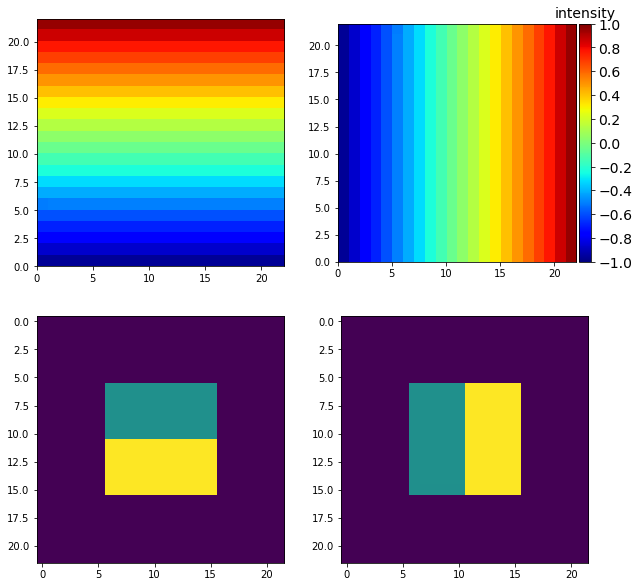

In [14]:
obj = tc.ones((1,5,10,10))
p = tc.full((1,5,5,10), 0.5)
obj[:,:,:5,:] = p

p2d = (6, 6, 6, 6)
obj_pad = F.pad(obj, p2d, "constant", 0)


g = F.affine_grid(m, obj_pad.shape)
q = F.grid_sample(obj_pad, g, padding_mode='border')

fig1 = plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,1])


fig1_ax1 = fig1.add_subplot(gs1[0])
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax1.imshow(g[0,:,:,0], cmap='jet', vmin=-1.0, vmax=1.0, extent=[0, 22, 0, 22], origin='upper')
# ticks = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
# cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
# cbar.ax.tick_params(labelsize=14) 
# cbar.ax.set_title('intensity', size='14')

fig1_ax2 = fig1.add_subplot(gs1[1])
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax2.imshow(g[0,:,:,1], cmap='jet', vmin=-1.0, vmax=1.0, extent=[0, 22, 0, 22], origin='upper')
divider = make_axes_locatable(fig1_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')


fig1_ax3 = fig1.add_subplot(gs1[2])
fig1_ax3.imshow(obj_pad[0,0])

fig1_ax4 = fig1.add_subplot(gs1[3])
fig1_ax4.imshow(q[0,0])

## Rotate a 2D object with multiple channels

torch.Size([2, 5, 22, 22])


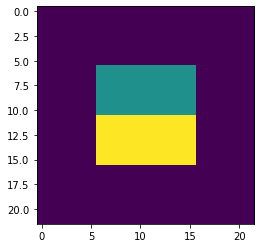

In [15]:
obj = tc.ones((2,5,10,10))  #(n_channels, height, side_1_length_of_2d_layer, side_2_length_of_2d_layer)
p = tc.full((2,5,5,10), 0.5)
obj[:,:,:5,:] = p
#p3d = (6, 6, 6, 6, 6, 6)
obj_pad = F.pad(obj, p2d, "constant", 0)

print(obj_pad.shape)
plt.imshow(obj_pad[0,0])

torch.Size([2, 2, 3])


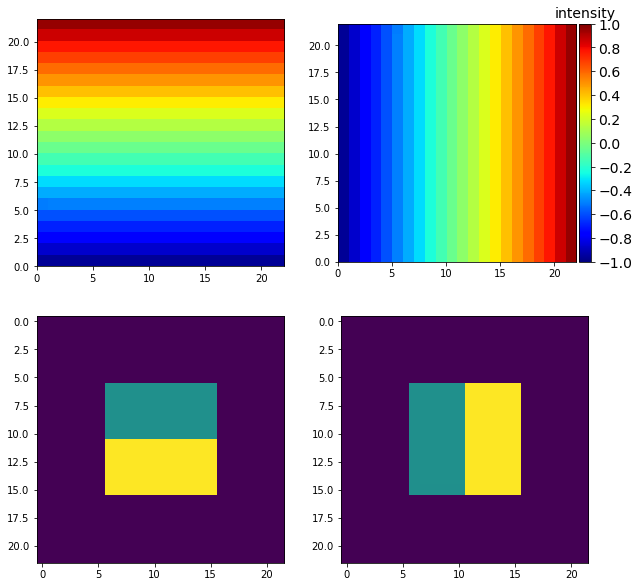

In [16]:
m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0])
m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0])
m = tc.stack([m0, m1]).view(1, 2, 3)
# print(m.shape)
m_batch = m.repeat([obj.shape[0], 1, 1])
print(m_batch.shape)

g = F.affine_grid(m_batch, obj_pad.shape)   # The affine transformation matrix
q = F.grid_sample(obj_pad, g, padding_mode='border')

fig1 = plt.figure(figsize=(10,10))
gs1 = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,1])


fig1_ax1 = fig1.add_subplot(gs1[0])
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax1.imshow(g[0,:,:,0], cmap='jet', vmin=-1.0, vmax=1.0, extent=[0, 22, 0, 22], origin='upper')
# divider = make_axes_locatable(fig1_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig1_ax2 = fig1.add_subplot(gs1[1])
# fig1_ax1.grid(color='w', linewidth=2)
pos = fig1_ax2.imshow(g[0,:,:,1], cmap='jet', vmin=-1.0, vmax=1.0, extent=[0, 22, 0, 22], origin='upper')
divider = make_axes_locatable(fig1_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar = fig1.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')


fig1_ax3 = fig1.add_subplot(gs1[2])
fig1_ax3.imshow(obj_pad[0,0])

fig1_ax4 = fig1.add_subplot(gs1[3])
fig1_ax4.imshow(q[0,0])

NameError: name 'explode' is not defined

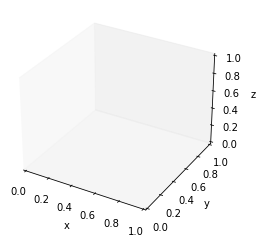

In [19]:
from mpl_toolkits.mplot3d import Axes3D
def make_ax(grid=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.grid(grid)
    return ax

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

ax = make_ax()
colors = np.array([[['#1f77b430']*3]*3]*3)
colors[1,1,1] = '#ff0000ff'
colors = explode(colors)
filled = explode(np.ones((3, 3, 3)))
x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))
ax.voxels(x, y, z, filled, facecolors=colors, edgecolors='gray', shade=False)
plt.show()

In [20]:
IMG_DIM = 50
transformed = np.zeros((IMG_DIM,IMG_DIM,IMG_DIM))
transformed[:,:5,5:10] = 1


from skimage.transform import resize
resized = resize(transformed, (IMG_DIM, IMG_DIM, IMG_DIM), mode='constant')